In [4]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from PIL import Image
from wordcloud import WordCloud
import os

In [ ]:
# Đọc dữ liệu
with open("CUHK-PEDES/reid_raw.json", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data)
df.head()

,split,captions,file_path,processed_tokens,id
0,train,[A pedestrian with dark hair is wearing red an...,CUHK01/0363004.png,"[[a, pedestrian, with, dark, hair, is, wearing...",1
1,train,"[A man wearing a black jacket, black pants, re...",CUHK01/0363003.png,"[[a, man, wearing, a, black, jacket, black, pa...",1
2,train,"[The man is wearing a black jacket, green jean...",CUHK01/0363001.png,"[[the, man, is, wearing, a, black, jacket, gre...",1
3,train,[He's wearing a black hooded sweatshirt with a...,CUHK01/0363002.png,"[[hes, wearing, a, black, hooded, sweatshirt, ...",1
4,train,[The man is walking. He is wearing a bright g...,train_query/p8130_s10935.jpg,"[[the, man, is, walking, he, is, wearing, a, b...",2


In [ ]:
# Thống kê cơ bản
num_images = len(df)
num_captions = df['captions'].apply(len).sum()
unique_ids = df['id'].nunique()

print("Số lượng ảnh:", num_images)
print("Số lượng mô tả:", num_captions)
print("Số lượng ID:", unique_ids)
print("Số mô tả trung bình/ảnh:", num_captions / num_images)

Số lượng ảnh: 40206
Số lượng mô tả: 80440
Số lượng ID: 13003
Số mô tả trung bình/ảnh: 2.000696413470626


In [8]:
df['split'].value_counts()
df.groupby('split')['id'].nunique()

split
test      1000
train    11003
val       1000
Name: id, dtype: int64

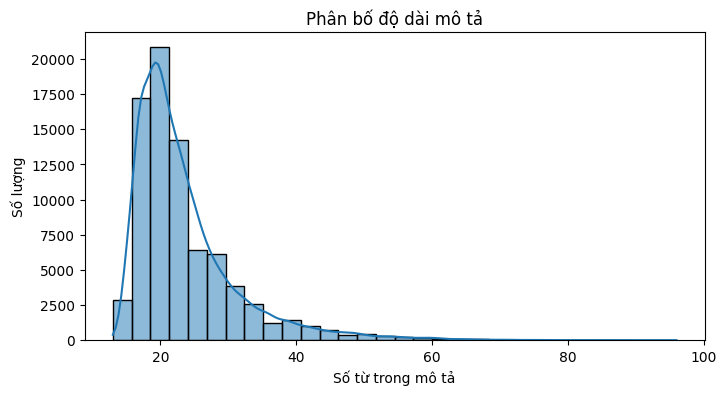

In [ ]:
# Phân bố độ dài mô tả
caption_lengths = [len(c.split()) for captions in df['captions'] for c in captions]

plt.figure(figsize=(8,4))
sns.histplot(caption_lengths, bins=30, kde=True)
plt.xlabel("Số từ trong mô tả")
plt.ylabel("Số lượng")
plt.title("Phân bố độ dài mô tả")
plt.show()

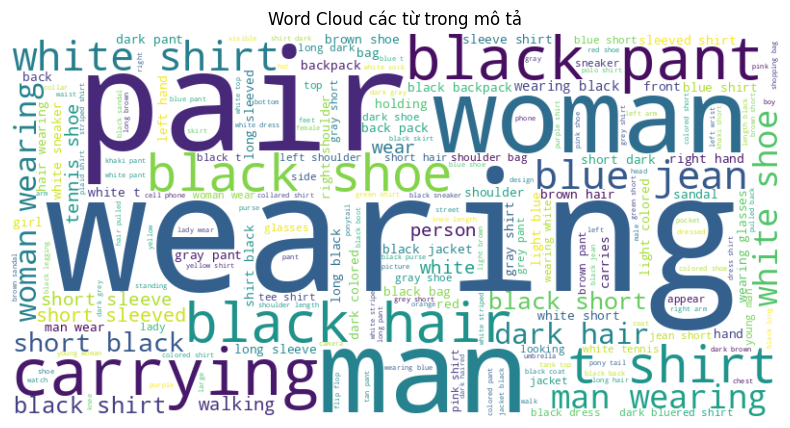

In [ ]:
# Word Cloud
all_captions = " ".join([c.lower() for captions in df['captions'] for c in captions])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_captions)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud các từ trong mô tả")
plt.show()

Số lượng kích thước duy nhất: 11555
Chiều rộng: 13 → 374 pixels
Chiều cao: 34 → 800 pixels


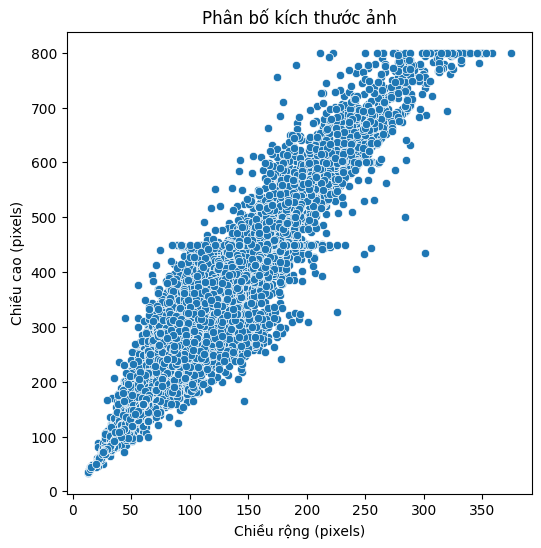

In [29]:
# Lưu kích thước ảnh
image_sizes = []

# Duyệt toàn bộ ảnh
for i in range(len(df)):
    img_path = os.path.join("CUHK-PEDES", "imgs", df.iloc[i]['file_path'])
    with Image.open(img_path) as img:
        image_sizes.append(img.size)

# Chuyển thành DataFrame
sizes_df = pd.DataFrame(image_sizes, columns=["width", "height"])

# Thống kê cơ bản
unique_sizes = sizes_df.drop_duplicates()
width_min, width_max = sizes_df['width'].min(), sizes_df['width'].max()
height_min, height_max = sizes_df['height'].min(), sizes_df['height'].max()

print(f"Số lượng kích thước duy nhất: {len(unique_sizes)}")
print(f"Chiều rộng: {width_min} → {width_max} pixels")
print(f"Chiều cao: {height_min} → {height_max} pixels")

# Vẽ biểu đồ nếu có nhiều kích thước
if len(unique_sizes) > 1:
    plt.figure(figsize=(6,6))
    sns.scatterplot(x="width", y="height", data=sizes_df)
    plt.title("Phân bố kích thước ảnh")
    plt.xlabel("Chiều rộng (pixels)")
    plt.ylabel("Chiều cao (pixels)")
    plt.show()
else:
    print("Tất cả ảnh có cùng một kích thước, không cần vẽ biểu đồ.")